### Linear array- (a few of) parameters computation using python script
<b> Authgor: Jay Gautam, Darmstadt Germany. (Please download code from my GitHub)\
<b> Objective of python script:
    1. Compute null to null beam width in case of broadside array
    2. Compute null to null beam width in case of end-fire array
    3. Compute directivity of array antenna
    4. Compute received power by a receiving antenna.\
<b> Note: I used functional approach paradigm. Object oriented approach can also be used to make it more compact and robust.

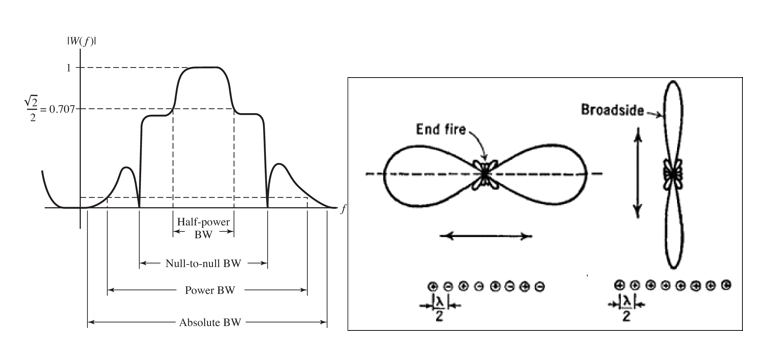

<b> Mathematics to implement to compute several parameters related to array antennas. Many other parameter can be implemented as well.
    
    array length = l, number of elements in array = N, spacing between antenna = d, wavelength = lambda
    Pt = transmit power, Pr = received power, Gt = Gain of transmit antenna, Gr = Gain of receive antenna

    spacing between antenna(d) = l/N
    Beamwith(broadside) = 2*lambda/(l*N)
    Beamwith(end-fire) = 2*sqrt(2*lambda/(l*N)
    Received power(Pr) = (Pt*Gt*Gr*(lambda)^2))/(4*Pi*d)^2
    Directivity(D) = 2*l/lambda
    Directivity(D)_dB = 10*log10(D)

#### Compute the null to null beam width of a broadside array (antenna elements are placed with 0 phase degree), with different case of number of antenna elements and array length.

In [1]:
def bw_broadside(l_array_length, N_number_elements):
    """
    l_array_length:  array length
    N_number_elements: number of elements in the array
    d_spacing_between_antennas: spacing between the antennas
    BW_bandwidth: null to null beamwidth
    """

    d_spacing_between_antennas = l_array_length/N_number_elements # spacing between the antennas
    BW_bandwidth = (2*(1/d_spacing_between_antennas)*(1/N_number_elements)) # null to null beamwidth
    print(f"Broadside array: the null to null beamwidth for l = {l_array_length}\u03BB and N = {N_number_elements} is: ", round(BW_bandwidth, 3))
    
bw_broadside(10, 20) 
bw_broadside(50, 100)
bw_broadside(20, 50)

Broadside array: the null to null beamwidth for l = 10λ and N = 20 is:  0.2
Broadside array: the null to null beamwidth for l = 50λ and N = 100 is:  0.04
Broadside array: the null to null beamwidth for l = 20λ and N = 50 is:  0.1


#### Compute the null to null beam width of a end-fire array (same as broadside except individual elements are fed with out of phase i.e. 180 degree), with different case of number of antenna elements and array length.

In [2]:
import math
def bw_end_fire(l_array_length, N_number_elements):
    """""
    l_array_length: array length
    N_number_elements: number of elements in the array
    d_spacing_between_antennas: spacing between the antennas    
    """""

    d_spacing_between_antennas = l_array_length/N_number_elements # spacing between the antennas
    BW_bandwidth = 2*math.sqrt(2*(1/d_spacing_between_antennas)*(1/N_number_elements)) # null to null beamwidth
    print(f"End fire array: the null to null beamwidth for l = {l_array_length}\u03BB and N = {N_number_elements} is: ", round(BW_bandwidth, 3))
    
bw_end_fire(10, 20)
bw_end_fire(50, 100)
bw_end_fire(20, 50)

End fire array: the null to null beamwidth for l = 10λ and N = 20 is:  0.894
End fire array: the null to null beamwidth for l = 50λ and N = 100 is:  0.4
End fire array: the null to null beamwidth for l = 20λ and N = 50 is:  0.632


#### Computation of null to null beam width and directivity in broadside case at particular frequency and array length.

In [9]:
def directivity_BW_null_to_null(f_ghz, l_array_length):
    """""
    f_ghz: frequency in GHz
    f_hz: frequency in Hz
    l_array_length: array length in meter
    """""
    f_hz = f_ghz*10**9    # frequency in Hz
    c = 3*10**8 # speed of light
    l_array_length = 10 # array length in meter
    wavelength = c/f_hz # lambda = speed_light/frequency
    BW_null_to_null = 2*(wavelength/l_array_length) # bandwidth in radian; BW = 2*lambda/l
    directivity = 2*(l_array_length/wavelength) # Directivity: D = 2*l/lambda
    directivity_db = 10*math.log10(directivity)
    print(f"Data: given frequency = {f_ghz} GHz and Array length = {l_array_length} meter.")
    print(f"Broadside array: Null to null beamwidth = {BW_null_to_null} radian")
    print(f"Directivity(D) = {directivity}")
    print(f"Directivity(D) in dB scale = {directivity_db} dB")
    print()

directivity_BW_null_to_null(6, 10)
directivity_BW_null_to_null(0.006, 10)  

Data: given frequency = 6 GHz and Array length = 10 meter.
Broadside array: Null to null beamwidth = 0.01 radian
Directivity(D) = 400.0
Directivity(D) in dB scale = 26.020599913279625 dB

Data: given frequency = 0.006 GHz and Array length = 10 meter.
Broadside array: Null to null beamwidth = 10.0 radian
Directivity(D) = 0.4
Directivity(D) in dB scale = -3.979400086720376 dB



#### Computation of received power by a receiver dipole when power is transmitted by a transmitting dipole at some frequency and some distance between the Tx and Rx antennas.

In [4]:
import math
def received_power(p_transmit_watt, f_Mhz, d_meter):
    """
    p_transmit_watt: transmitted(radiated) power from the transmitter in watt
    f_Mhz : frequency of operation in MHz. 
    d_meter: distance between the dipoles in meters
    
    """
    f_hz = f_Mhz*10**6 # frequency in Hz    
    c = 3*10**8 # speed of light in m/s

    wavelength = c/f_hz # lambda = speed_light/frequency
    G_transmit = 1.64 # gain of transmitting dipole in dB
    G_receive = 1.64 # gain of receiving dipole in dB

    p_received = (p_transmit_watt*G_transmit*G_receive*(wavelength)**2/(4*(math.pi)*d_meter)**2) # received power by the second dipole in watt
    
    print(f"Provided data: Distance between dipole = {d_meter} m, frequency = {f_Mhz} MHz, Transmitted power = {p_transmit_watt} Watt.")
    #print()
    print(f"The received power by the receiving dipole = {round(p_received, 3)} Watt")
    print()
    
received_power(15, 60, 10)
received_power(15, 60000, 10)
received_power(15000000, 60000, 10)

Provided data: Distance between dipole = 10 m, frequency = 60 MHz, Transmitted power = 15 Watt.
The received power by the receiving dipole = 0.064 Watt

Provided data: Distance between dipole = 10 m, frequency = 60000 MHz, Transmitted power = 15 Watt.
The received power by the receiving dipole = 0.0 Watt

Provided data: Distance between dipole = 10 m, frequency = 60000 MHz, Transmitted power = 15000000 Watt.
The received power by the receiving dipole = 0.064 Watt

